Multiple Linear Regression

In [28]:
import numpy as np  #used for numerical operations,arrays,linear algebra
import pandas as pd #used for data manipulation and analysis
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

houses=fetch_california_housing()
x=pd.DataFrame(houses.data,columns=houses.feature_names)  #features(numerical predictors),target values(house prices),name of the features
y=pd.DataFrame(houses.target) #it contains the median house values for each block 

In [29]:
print(x.head())
print("hello\n")

print(y.tail())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
hello

           0
20635  0.781
20636  0.771
20637  0.923
20638  0.847
20639  0.894


In [30]:
x=x[['MedInc','AveRooms']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) #80% training data,20% testing data random state is used to ensure reproducibility which means that every time you run the code with the same random state, you will get the same split of data.

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)
y_prediction=model.predict(x_test)
print(y_prediction)

[[1.16230214]
 [1.49913482]
 [1.95573059]
 ...
 [4.33311942]
 [1.59978552]
 [1.98667198]]


C:\Users\12san\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


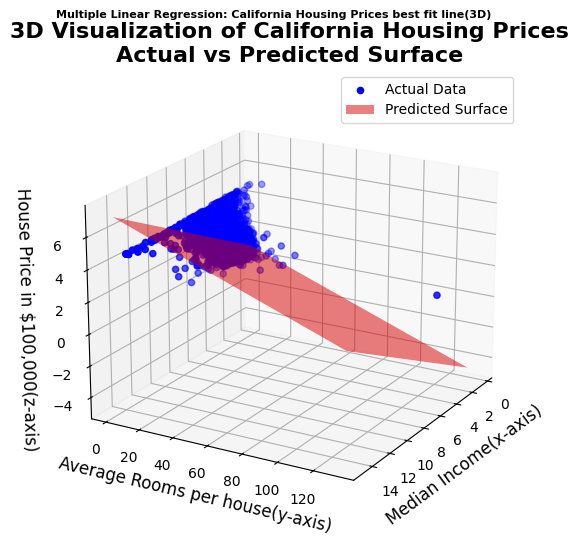

In [53]:
from IPython.display import display, HTML

fig=plt.figure(figsize=(13,6)) #means width=10 inches,height=7 inches just one big plot
ax=fig.add_subplot(111,projection='3d') #

ax.scatter(x_test['MedInc'],x_test['AveRooms'],y_test,color='blue',label='Actual Data')  #x-axis:MedianIncome,y-axis:AverageRooms,z-axis:Actual house prices(y_test)

x1_range=np.linspace(x_test['MedInc'].min(),x_test['MedInc'].max(),100)   #creates 100 evenly spaced values between the minimum and maximum of 'MedInc' in the test set
x2_range=np.linspace(x_test['AveRooms'].min(),x_test['AveRooms'].max(),100)
x1,x2=np.meshgrid(x1_range,x2_range) #creates a grid of coordinates from the two 1D arrays x1_range and x2_range

z=model.predict(np.c_[x1.ravel(),x2.ravel()]).reshape(x1.shape) # np.c_[...] ->combine them as columns,so each row is a pair[MedInc,AveRooms] ravel function used to convert the 2D arr into 1D arr
#.reshape(x1.shape) ->reshape the predicted values back into the shape of 2D grid so it can be plotted

ax.plot_surface(x1,x2,z,color='red',alpha=0.5,rstride=100,cstride=100,label='Predicted Surface') 

#ax.plot_surface → plots a 3D surface.
#color='red' → surface is red
#alpha=0.5 → make the surface semi-transparent
#rstride=100, cstride=100 → plot every 100th row/column for efficiency (sparse surface)
#label='Predicted Surface' → label for legend

ax.set_xlabel('Median Income(x-axis)',fontsize=12)
ax.set_ylabel('Average Rooms per house(y-axis)',fontsize=12)
ax.set_zlabel('House Price in $100,000(z-axis)',fontsize=12)
fig.suptitle('Multiple Linear Regression: California Housing Prices best fit line(3D)',fontsize=8,fontweight='bold')
ax.set_title('3D Visualization of California Housing Prices\nActual vs Predicted Surface',fontsize=16,fontweight='bold') #purpose

ax.legend()

ax.view_init(elev=20,azim=30) #elev ->elevation angle,azim ->azimuth angle
plt.show() #display the plot
display(HTML("<p style='font-size:18px'>This visualization helps us to understand how these two features influence the predicted house prices.</p>"))
